In [1]:
import numpy as np

In [2]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [3]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

In [4]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             #convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

In [5]:
dataMat, labelMat = loadDataSet()

In [6]:
weights = gradAscent(dataMat, labelMat)

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0] 
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2');
    plt.show()

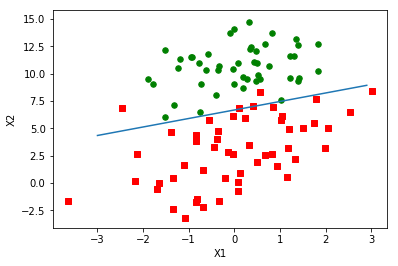

In [9]:
plotBestFit(weights.getA())

In [10]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not 
            randIndex = int(np.random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            np.delete(dataIndex, randIndex)
    return weights

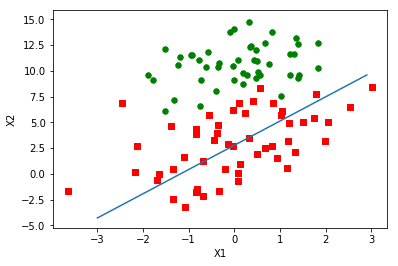

In [11]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(np.array(dataArr), labelMat)
plotBestFit(weights)

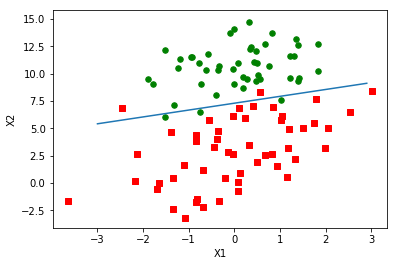

In [12]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(np.array(dataArr), labelMat)
plotBestFit(weights)

In [13]:
import pandas as pd

In [14]:
train = pd.read_csv('hw3_train.dat', sep = '\s', header=None, engine='python')
test = pd.read_csv('hw3_test.dat', sep = '\s', header=None, engine='python')

In [15]:
eta = 0.001
t = 2000

In [16]:
def sigmoid(s):
    return 1.0 / (1 + np.exp(-s))

In [17]:
def sgd(X, y, alpha, maxCycles):
    m,n = np.shape(X)
    weights = np.zeros((n,1))
    for k in range(maxCycles):              
        n = k % m
        weights = weights - alpha * np.mat(sigmoid(-X[n].dot(weights) * y[n]) * (-y[n] * X[n])).T
    return weights

In [22]:
def gd(X, y, alpha, maxCycles):
    m,n = np.shape(X)
    weights = np.zeros(n)
    for k in range(maxCycles):       
        delta = np.mean((sigmoid(-y*X.dot(weights))*(-y)).reshape(m,1)*X, axis=0) # 注意别写成(sigmoid(-y*X.dot(weights))).reshape(m,1)*(-y.dot(X))
        weights = weights - alpha * delta
        #print(weights)
    return weights

In [19]:
def sign(x):
    return np.where(x > 0, 1, -1)

In [20]:
X = np.array(train.iloc[:,range(0, 20)])
Y = np.array(train.iloc[:, 20])

In [23]:
#gd
weights = gd(X, Y, eta, t)
X_test = np.array(test.iloc[:,range(0, 20)])
Y_test = np.array(test.iloc[:, 20])
yhat = sign(X_test.dot(weights))
error = (yhat.reshape(3000, ) != Y_test).sum() / len(Y_test)
error

0.4716666666666667

In [24]:
#sgd
weights = sgd(X, Y, eta, t)
X_test = np.array(test.iloc[:,range(0, 20)])
Y_test = np.array(test.iloc[:, 20])
yhat = sign(X_test.dot(weights))
error = (yhat.reshape(3000, ) != Y_test).sum() / len(Y_test)
error

0.4716666666666667